In [1]:
import matplotlib
# matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.ticker import FormatStrFormatter
import torch
from utils.utils_numpy import nrmse
from utils.utils_vis import axis_font_size, title_font_size, ticks_font_size, width_in_inches, Colors
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
save = False
if save:
    outpath = "output/vis_report_final"
    for subfolder in ["aleatoric", "epistemic", "vivo", "appendix"]:
        if not os.path.exists(f"{outpath}/{subfolder}"):
            os.makedirs(f"{outpath}/{subfolder}")

In [3]:
pred_paths = {
    'NLLS' : 'output/vivo/nlls',
    'PINN' : 'output/vivo/pinn_ph_dcenet_4/predictions',
    'PINN (ens)' : 'output/vivo/pinn_ph_dcenet_ens/predictions',
    # "SNN": "output/normal/snn_dcenet_1/predictions",
    'MVE' : 'output/normal/mve_snn_dcenet_0/predictions',
    'MVE (ens)' : 'output/normal/mve_snn_dcenet_ens/predictions',
    # 'mve (pi)' : 'output/vivo/mve_pinn_dcenet_2/predictions',
    # 'mve (pi), ensemble' : 'output/vivo/mve_pinn_dcenet_ens/predictions',
}

preds = {
    name: np.load(os.path.join(path, "vivo_preds.npz")) for name, path in pred_paths.items()
}

data = np.load("data/vivo/voxel/test.npz")

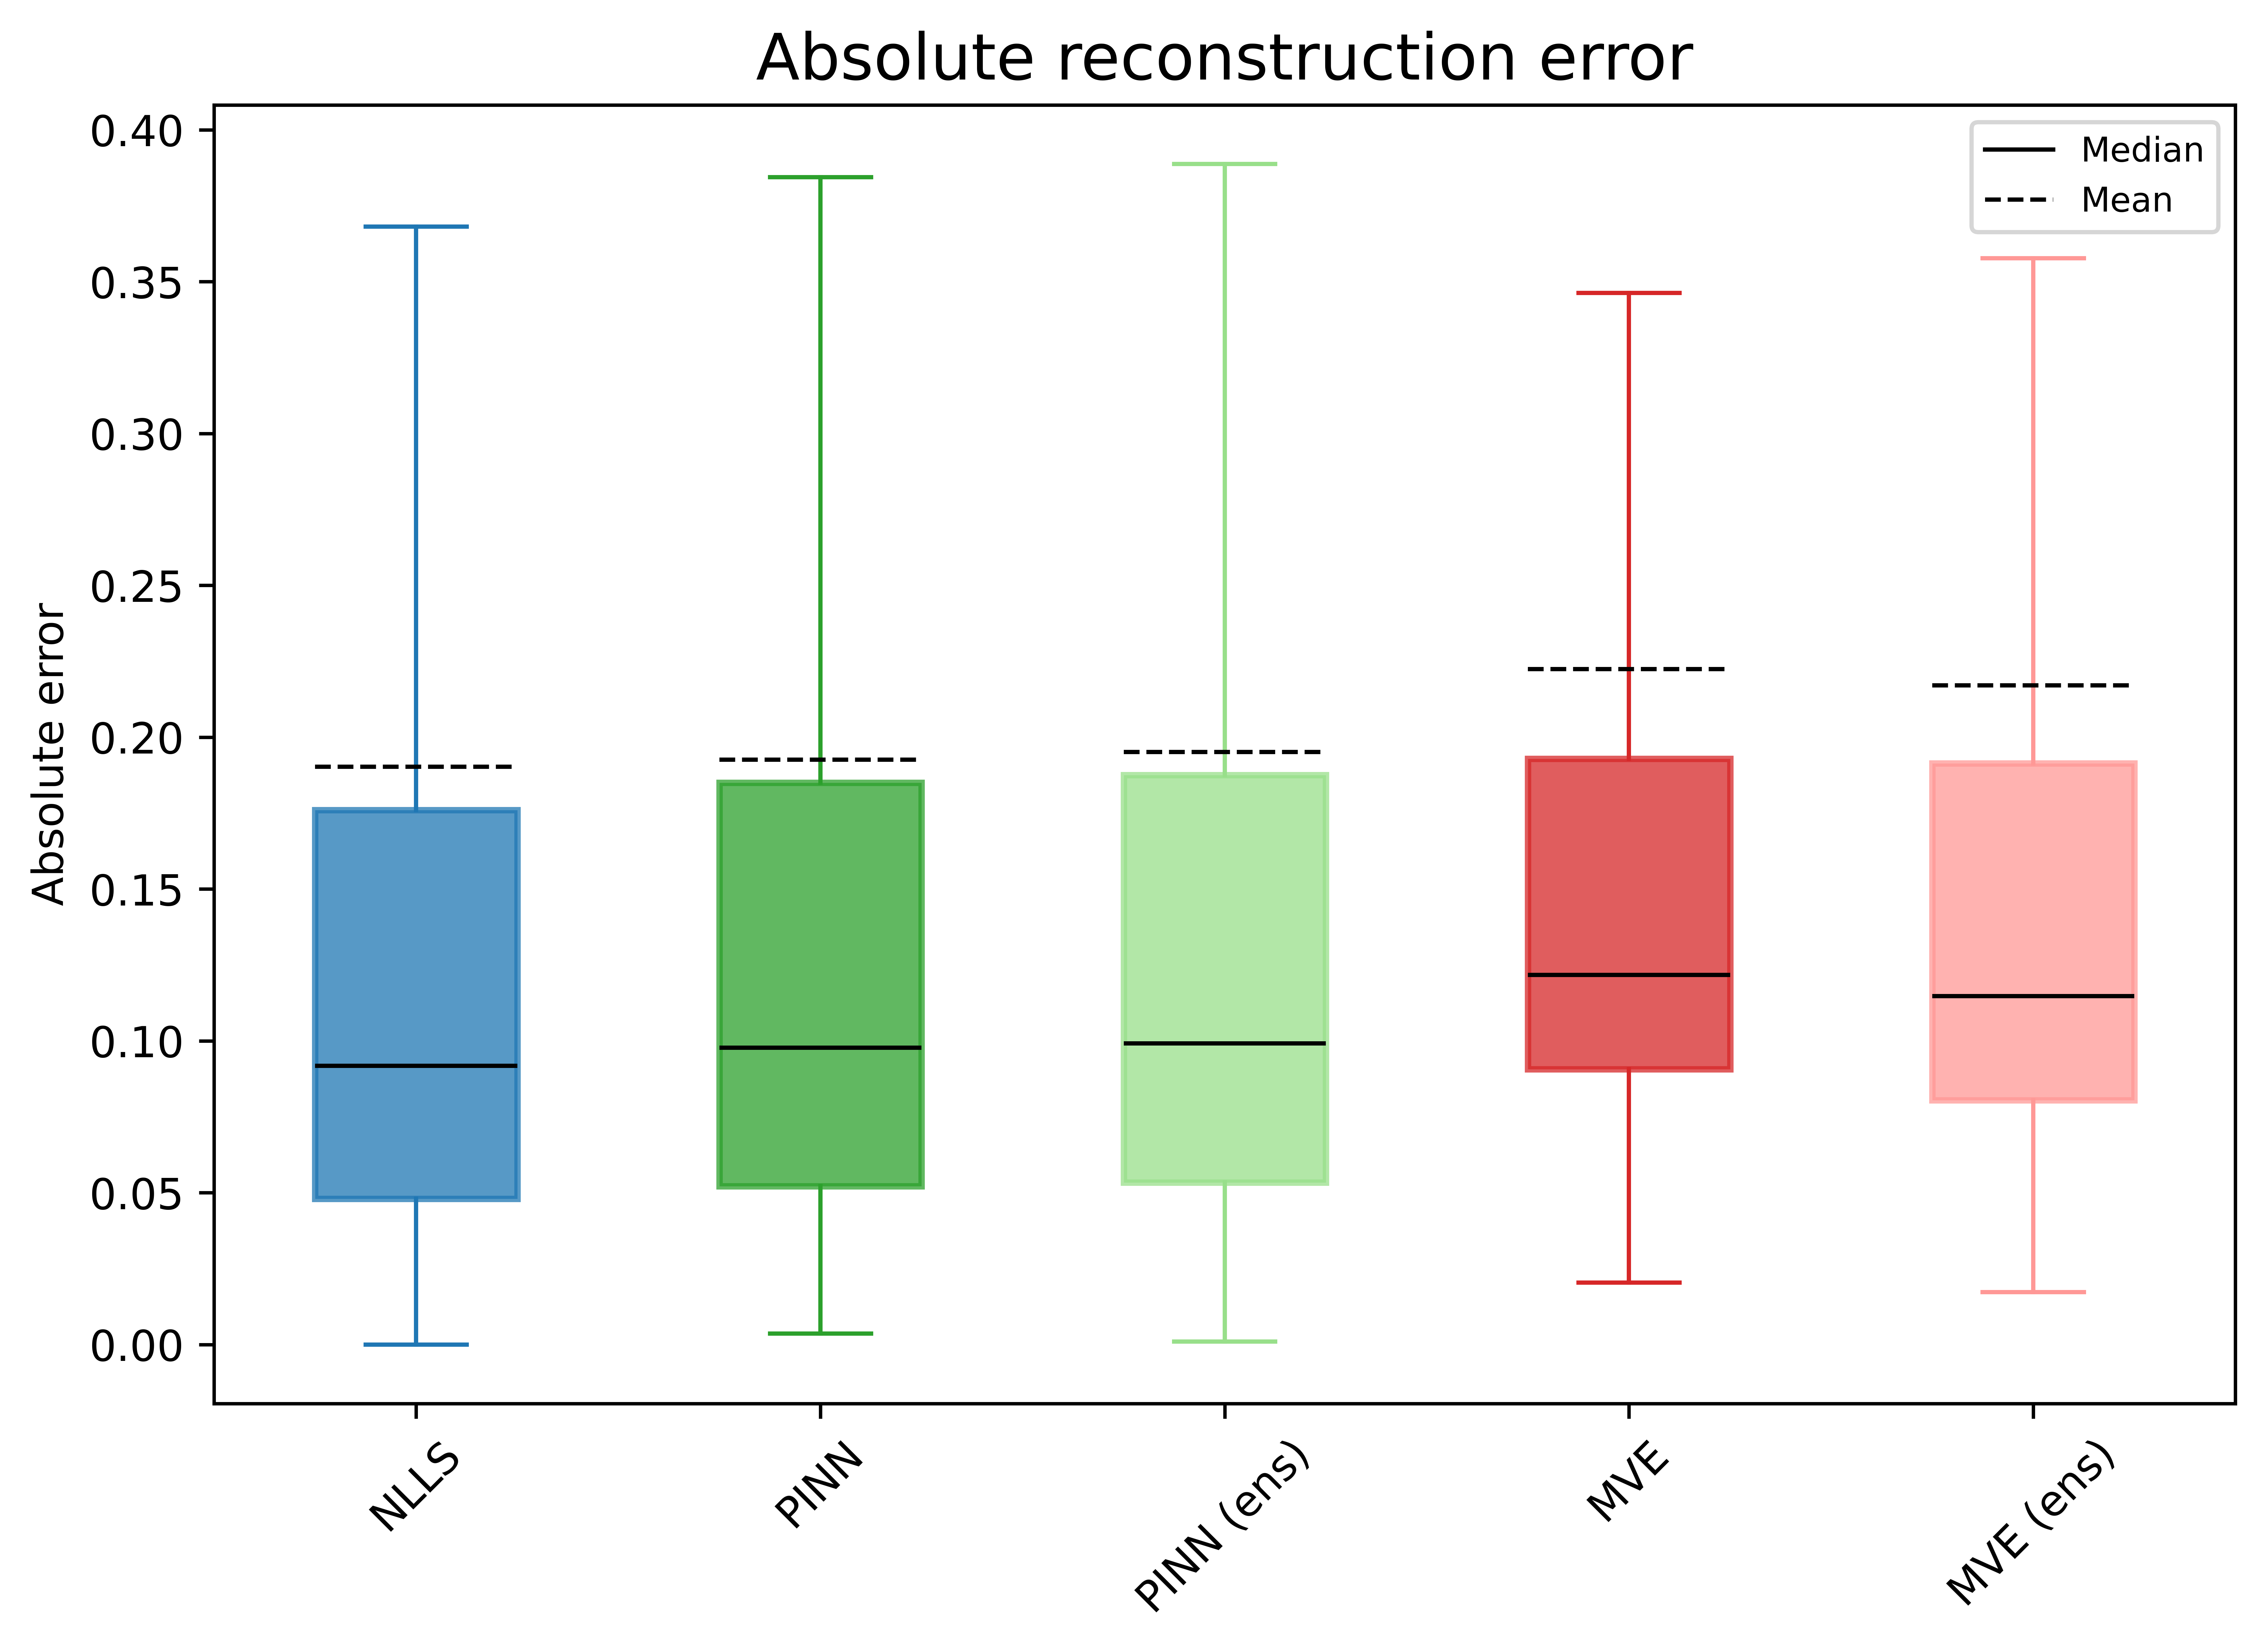

In [4]:
errors = {
    name: np.mean(np.abs(data['concentrations'] - preds[name]['reconstruction']), axis=-1) for name in pred_paths.keys()
}

errors_array = np.array(list(errors.values())).reshape(len(pred_paths), -1).T

fig, ax = plt.figure(dpi=1000, figsize=(width_in_inches, width_in_inches-2)), plt.gca()
# set size


bp = ax.boxplot(errors_array[:,:], positions=np.arange(len(pred_paths)), showfliers=False, showmeans=True, meanline=True, patch_artist=True)

for j, model in enumerate(pred_paths.keys()):
    color = Colors[model]
    plt.setp(bp['boxes'][j], color=color, linewidth=1.5, alpha=0.75, facecolor=color)
    plt.setp(bp['medians'][j], color='black')
    plt.setp(bp['means'][j], color='black')
    plt.setp(bp['whiskers'][2*j], color=color)
    plt.setp(bp['whiskers'][2*j+1], color=color)
    plt.setp(bp['caps'][2*j], color=color)
    plt.setp(bp['caps'][2*j+1], color=color)

ax.set_xticks(range(len(pred_paths)))
ax.set_xticklabels(pred_paths.keys(), rotation=45, fontsize=axis_font_size)
ax.set_ylabel("Absolute error", fontsize=axis_font_size)
ax.set_title("Absolute reconstruction error", fontsize=title_font_size)


# add legend with mean and median
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='black', lw=1),
                Line2D([0], [0], color='black', lw=1, linestyle='--')]
ax.legend(custom_lines, ['Median', 'Mean'], loc='upper right', fontsize=ticks_font_size)
plt.tight_layout()
if save:
    plt.savefig(f"{outpath}/vivo/boxplot_reconstruction_error.jpg", dpi=1000, format='jpg')
plt.show()



In [12]:
for model in pred_paths:
    print(f"{model} error: {np.mean(errors[model]):.4f} +/- {np.std(errors[model]):.4f}")

NLLS error: 0.1903 +/- 0.5971
PINN error: 0.1926 +/- 0.5701
PINN (ens) error: 0.1952 +/- 0.5729
MVE error: 0.2224 +/- 0.6164
MVE (ens) error: 0.2171 +/- 0.6170


In [13]:
errors['NLLS'].shape

(1373859,)